<a href="https://colab.research.google.com/github/juanlotep/proyecto_final_inteligencia_artificial/blob/main/proyecto_regresion_clasificacion_de_caracterisitcas_asociadas_a_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from scipy.spatial import distance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc

from scipy import interp

from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA 

In [ ]:
dataframe = pd.read_csv("newhousing.csv",sep=',')
dataframe.head(545)

In [ ]:
Datos = dataframe.dropna()
Datos.head(545)

In [ ]:
Datos.describe()# saca una pequeña descripcion del dataseet

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,1819.852599,0.446361
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,839.091825,0.159492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,0.166667
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1237.500000,0.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2183.333333,0.500000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,6600.000000,1.000000


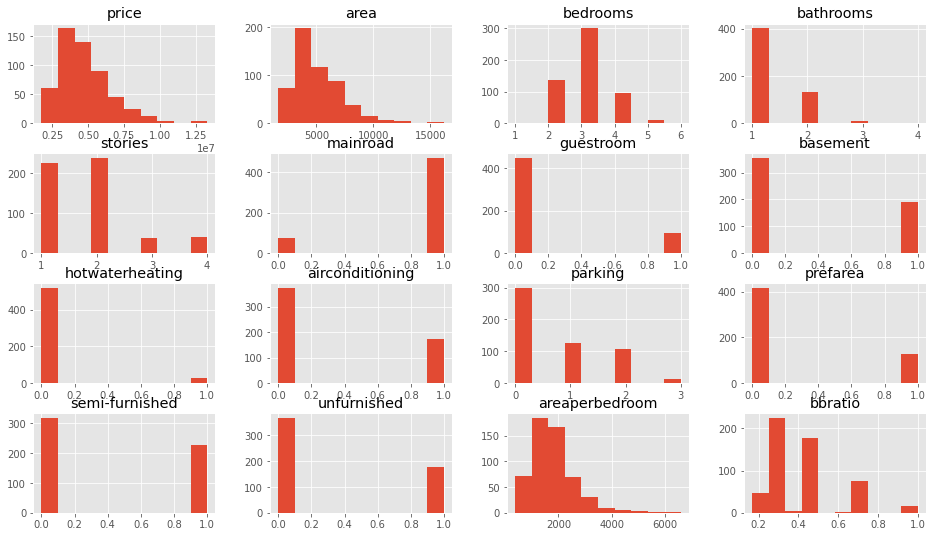

In [ ]:
Datos.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


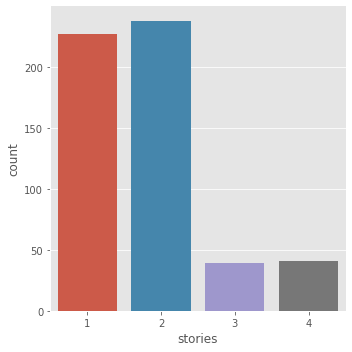

In [ ]:
sb.factorplot('stories',data=Datos,kind="count", aspect=1)

In [ ]:
X = Datos[['price','area','bedrooms','bathrooms','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','semi-furnished','unfurnished','areaperbedroom','bbratio']].values
y = Datos['stories'].values  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)
# el modelo del escalizador lo entreno con el conjuntto de entrenamiento, con ese modelo escalizo los datos del conjunto de validamiento, entrenamiento y muestras nuevas que llegan
scaler = StandardScaler()
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

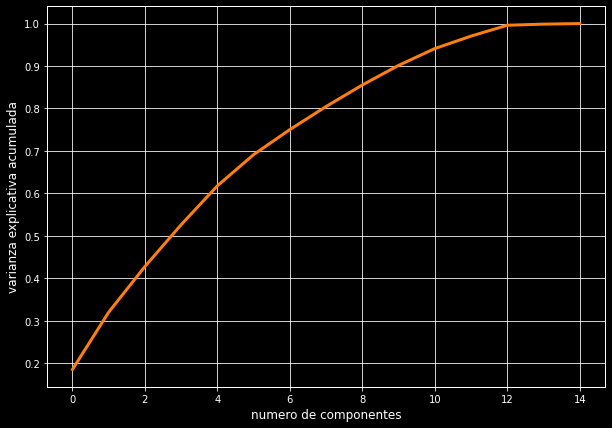

In [ ]:
pca = PCA()
Xs=pca.fit(X_train)
plt.figure(figsize=(10,7))
plt.style.use("dark_background")
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=3)
plt.xlabel("numero de componentes")
plt.ylabel("varianza explicativa acumulada")
plt.show()

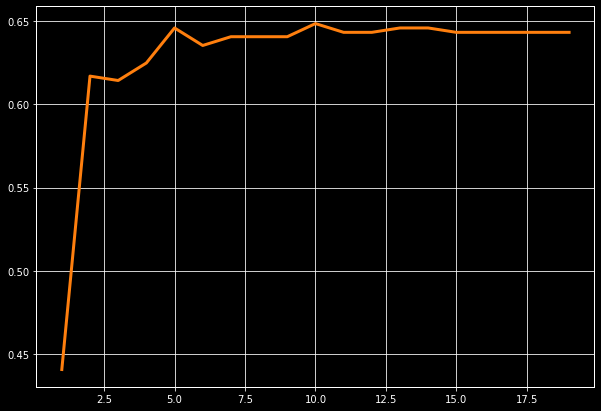

In [ ]:
n_componentes = np.arange(1,20)

scores_train = []
scores_test = []

for n_componente in n_componentes:
  x_proj_train = pca.transform(X_train)[:,0:n_componente]
  x_proj_test  = pca.transform(X_test)[:,0:n_componente]
  kernels=['linear', 'poly', 'rbf', 'sigmoid']
  Kernel=2
  msv = svm.SVC(kernel=kernels[Kernel],gamma = 0.1,C = 1000)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 

  clf = SVC(gamma = 0.001)
  clf.fit(x_proj_train,y_train)
  y_predicted_train = clf.predict(x_proj_train)
  y_predicted_test  =clf.predict(x_proj_test)

  scores_train.append(accuracy_score(y_true = y_train, y_pred = y_predicted_train))
  scores_test.append(accuracy_score(y_true = y_test , y_pred =y_predicted_test ))

plt.figure(figsize = (10,7))
plt.plot(n_componentes, scores_train, color = "tab:orange", linewidth = 3)
plt.show()

In [ ]:
from sklearn import svm
x_proj_train = pca.transform(X_train)[:,0:10]
x_proj_test  = pca.transform(X_test)[:,0:10]

kernels=['linear', 'poly', 'rbf', 'sigmoid']
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma = 0.001,C = 1000)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 
msv.fit(x_proj_train,y_train)


y_test_predicted_kernel_rbf = msv.predict(x_proj_test)
y_test_scores_kernel_rbf = msv.decision_function(x_proj_test)# probabilidad de que realmente sea esa clase
MCC_kernel_rbf = matthews_corrcoef(y_test, y_test_predicted_kernel_rbf)
print("matthews_corrcoef", MCC_kernel_rbf)
ACC_kernel_rbf = accuracy_score(y_test, y_test_predicted_kernel_rbf)
print("Accuracy", ACC_kernel_rbf)

matthews_corrcoef 0.505358934828224
Accuracy 0.6951219512195121


In [ ]:
from sklearn.metrics import matthews_corrcoef
# se va a tomar k como un hiperparametro
gamma_range = range(1, 100)# k es la raiz cuadrada del numero de mueestras de mi problema, va de k=1 hasta el la parte entera de la raiz cuadrada

ACC_kernel_rbf_variacion=[]
MCC_kernel_rbf_variacion=[]
TPR_kernel_rbf_variacion=[]
FPR_kernel_rbf_variacion=[]

for gamma in gamma_range:#por ahora variemos K, 
    msv_rbf = svm.SVC(kernel=kernels[Kernel],gamma = gamma,C = 1000)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 
    msv_rbf.fit(x_proj_train, y_train)
    ACC_kernel_rbf_variacion.append(msv_rbf.score(x_proj_test, y_test))
    MCC_kernel_rbf_variacion.append(matthews_corrcoef(y_test, msv_rbf.predict(x_proj_test)))

ACC


Text(0.5, 0, 'gamma')

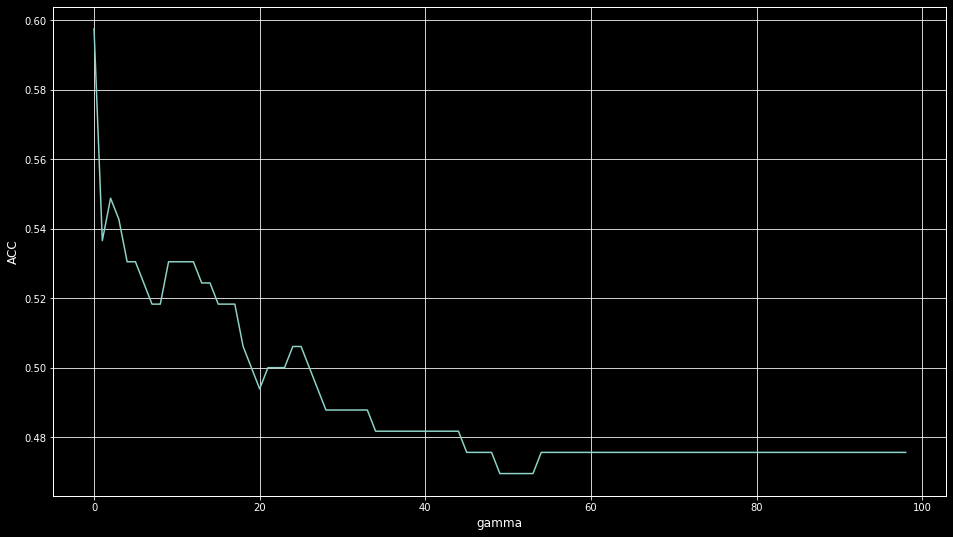

In [ ]:
print("ACC")
plt.plot(ACC_kernel_rbf_variacion)
plt.ylabel('ACC')
plt.xlabel('gamma')

MCC


Text(0.5, 0, 'gamma')

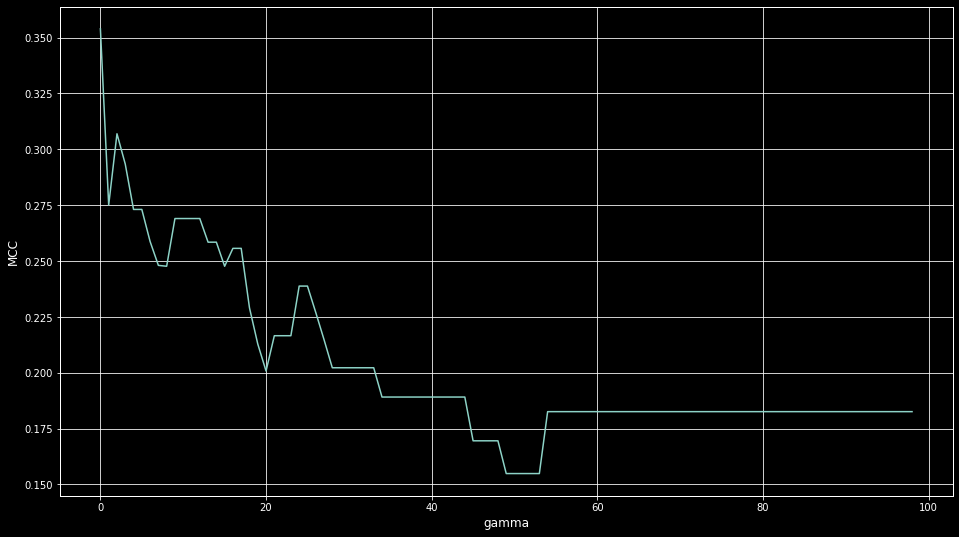

In [ ]:
print("MCC")
plt.plot(MCC_kernel_rbf_variacion)
plt.ylabel('MCC')
plt.xlabel('gamma')

In [ ]:
print("Matriz de confusion:")
print(confusion_matrix(y_test, y_test_predicted_kernel_rbf))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, y_test_predicted_kernel_rbf))

Matriz de confusion:
[[52 15  1  0]
 [10 57  0  3]
 [ 2 11  0  3]
 [ 1  3  1  5]]
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        68
           2       0.66      0.81      0.73        70
           3       0.00      0.00      0.00        16
           4       0.45      0.50      0.48        10

    accuracy                           0.70       164
   macro avg       0.48      0.52      0.50       164
weighted avg       0.64      0.70      0.67       164



In [ ]:
## ------------- prueba con el mejor gamma obtenido, y hallando el mejor C: ----------##

from sklearn.metrics import matthews_corrcoef
# se va a tomar k como un hiperparametro
gamma_range = range(1, 1000)# k es la raiz cuadrada del numero de mueestras de mi problema, va de k=1 hasta el la parte entera de la raiz cuadrada

ACC_kernel_rbf_variacion=[]
MCC_kernel_rbf_variacion=[]
TPR_kernel_rbf_variacion=[]
FPR_kernel_rbf_variacion=[]

for gamma in gamma_range:#por ahora variemos K, 
    msv_rbf = svm.SVC(kernel=kernels[Kernel],gamma = 0.001,C = gamma)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 

    msv_rbf.fit(x_proj_train, y_train)

    ACC_kernel_rbf_variacion.append(msv_rbf.score(x_proj_test, y_test))# saco los score

    MCC_kernel_rbf_variacion.append(matthews_corrcoef(y_test, msv_rbf.predict(x_proj_test)))

ACC


Text(0.5, 0, 'C')

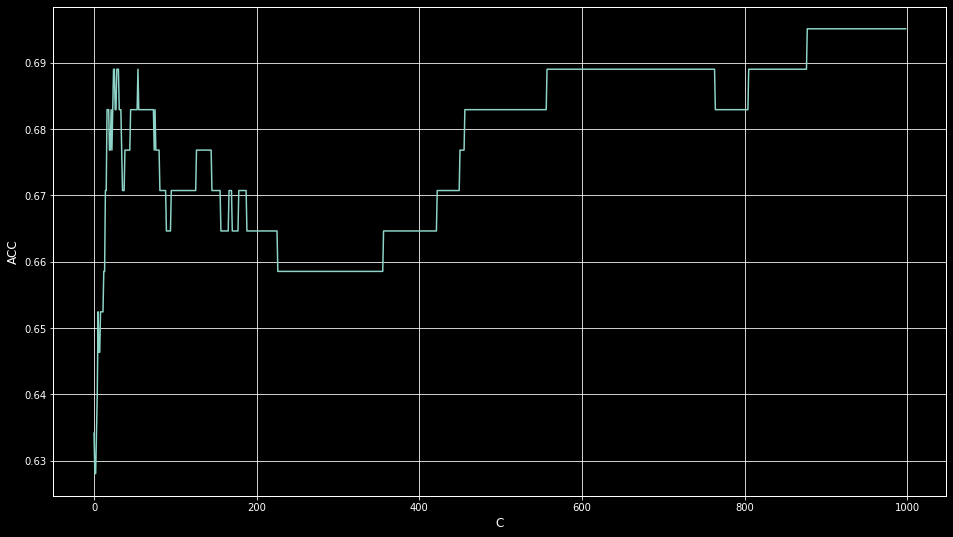

In [ ]:
print("ACC")
plt.plot(ACC_kernel_rbf_variacion)
plt.ylabel('ACC')
plt.xlabel('C')

MCC


Text(0.5, 0, 'C')

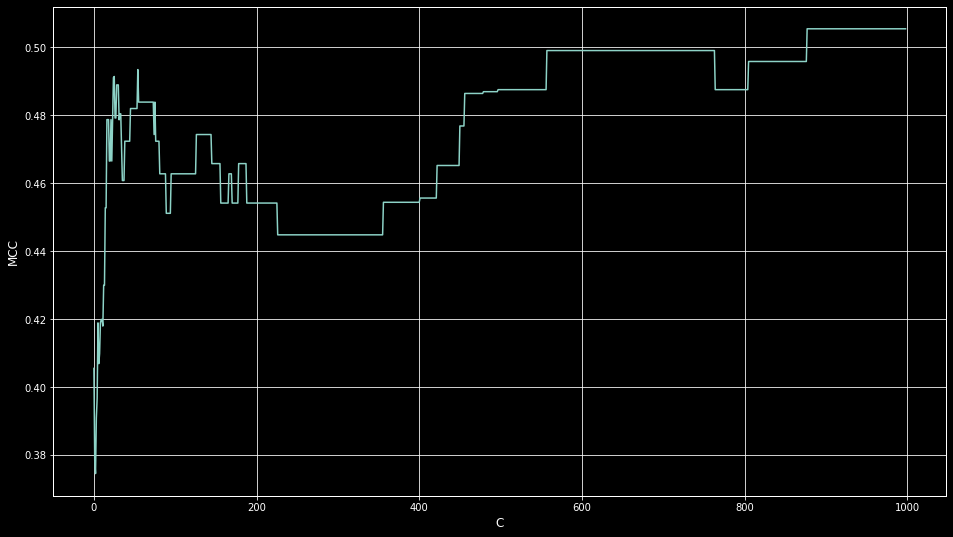

In [ ]:
print("MCC")
plt.plot(MCC_kernel_rbf_variacion)
plt.ylabel('MCC')
plt.xlabel('C')

In [ ]:
print("Matriz de confusion:")
print(confusion_matrix(y_test, y_test_predicted_kernel_rbf))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, y_test_predicted_kernel_rbf))

Matriz de confusion:
[[52 15  1  0]
 [10 57  0  3]
 [ 2 11  0  3]
 [ 1  3  1  5]]
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        68
           2       0.66      0.81      0.73        70
           3       0.00      0.00      0.00        16
           4       0.45      0.50      0.48        10

    accuracy                           0.70       164
   macro avg       0.48      0.52      0.50       164
weighted avg       0.64      0.70      0.67       164



**Busqueda de de los mesjores hiperparametros por medio de GridSearch:**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
      "kernel":["rbf"],
      "gamma" :[1e-3,1e-4],
      "C"     :[1,10,100,1000],  
    },
  # segunda malla de parametros:
    {
        "kernel": ["lienar"],
        "C"     : [1,10,100,100],
    },
]
GridSearchCV_msv = GridSearchCV(
    estimator = SVC(),
    param_grid = param_grid,
    cv = 5,
    scoring = "accuracy",
    refit = True,
    return_train_score= False,

)

GridSearchCV_msv.fit(x_proj_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 100], 'kernel': ['lienar']}],
             scoring='accuracy')

In [ ]:
GridSearchCV_msv.cv_results_
GridSearchCV_msv.best_estimator_


SVC(C=100, gamma=0.001)

In [ ]:
GridSearchCV_msv.best_score_

0.6587833219412167

In [ ]:
GridSearchCV_msv.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
GridSearchCV_msv.predict(x_proj_train)

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1,
       1, 2, 1, 1, 2, 4, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 4, 1, 1, 2, 4, 2, 2, 2, 2, 1, 4,
       4, 1, 2, 2, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 4, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 4, 2, 2, 2, 1, 2, 4, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 4, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 4, 4, 1, 1, 4, 1, 2, 4, 2, 2, 2, 2, 1, 2, 1, 2,
       4, 1, 2, 1, 1, 4, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 4, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 4, 2, 2, 1, 4, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 4, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 4, 1, 2, 2, 2, 2,

In [ ]:
y_test_kernel_rbf_grid = GridSearchCV_msv.predict(x_proj_test)
print("Matriz de confusion:")
print(confusion_matrix(y_test, y_test_kernel_rbf_grid))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, y_test_kernel_rbf_grid))

Matriz de confusion:
[[48 20  0  0]
 [ 9 59  0  2]
 [ 2 12  0  2]
 [ 1  6  0  3]]
              precision    recall  f1-score   support

           1       0.80      0.71      0.75        68
           2       0.61      0.84      0.71        70
           3       0.00      0.00      0.00        16
           4       0.43      0.30      0.35        10

    accuracy                           0.67       164
   macro avg       0.46      0.46      0.45       164
weighted avg       0.62      0.67      0.63       164



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
MCC_kernel_rbf_grid = matthews_corrcoef(y_test, y_test_kernel_rbf_grid)
print("matthews_corrcoef", MCC_kernel_rbf_grid)
ACC_kernel_rbf_grid = accuracy_score(y_test, y_test_kernel_rbf_grid)
print("Accuracy", ACC_kernel_rbf_grid)

matthews_corrcoef 0.46269301912618105
Accuracy 0.6707317073170732


#Clasificación y predicción con ovo:

In [ ]:
ovo=OneVsOneClassifier(LogisticRegression(random_state=0))
ovo.fit(x_proj_train, y_train)

predict_ovo=ovo.predict(x_proj_test)

print("matriz de confusion:")
print(confusion_matrix(y_test, predict_ovo))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, predict_ovo))

MCC_ovo = matthews_corrcoef(y_test, predict_ovo)
print("matthews_corrcoef", MCC_ovo)

ACC_ovo = accuracy_score(y_test, predict_ovo)
print("Accuracy", ACC_ovo)

matriz de confusion:
[[46 19  1  2]
 [ 9 59  0  2]
 [ 2 12  0  2]
 [ 1  4  1  4]]
              precision    recall  f1-score   support

           1       0.79      0.68      0.73        68
           2       0.63      0.84      0.72        70
           3       0.00      0.00      0.00        16
           4       0.40      0.40      0.40        10

    accuracy                           0.66       164
   macro avg       0.46      0.48      0.46       164
weighted avg       0.62      0.66      0.63       164

matthews_corrcoef 0.4581957416246933
Accuracy 0.6646341463414634


#clasificacion con Knn:

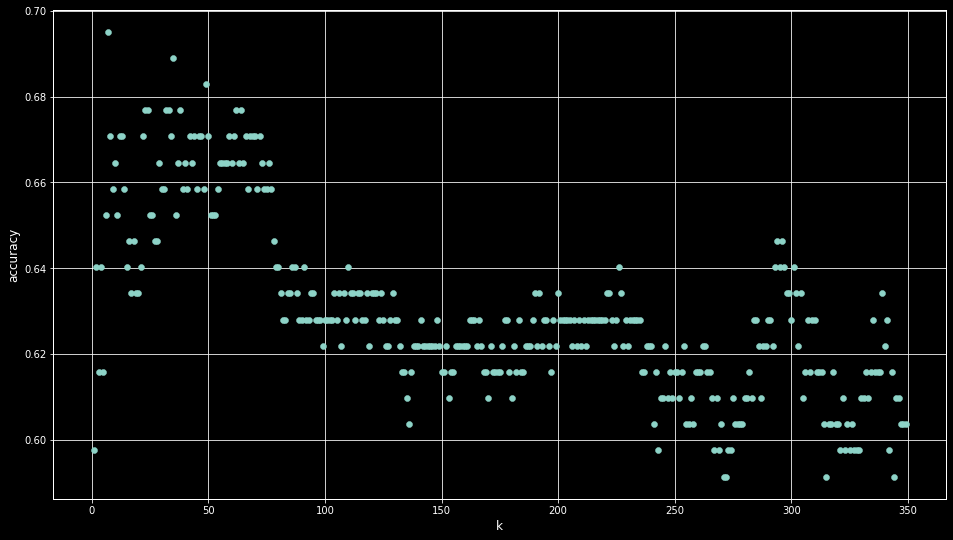

In [ ]:
# hallando el mejor K:
#obteniendo el mejor valor de K a partir del conjunto de validación con mejor accuracy
k_range = range(1, 350)
scores_knn = []
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_proj_train, y_train)
    scores_knn.append(knn.score(x_proj_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores_knn)

In [ ]:
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors,weights='uniform',metric='minkowski', metric_params=None,algorithm='brute')
knn.fit(x_proj_train, y_train)
predict_knn=knn.predict(x_proj_test)
print("matriz de confusion:")
print(confusion_matrix(y_test, predict_knn))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, predict_knn))

MCC_knn = matthews_corrcoef(y_test, predict_knn)
print("matthews_corrcoef", MCC_knn)

ACC_knn = accuracy_score(y_test, predict_knn)
print("Accuracy", ACC_knn)

matriz de confusion:
[[52 15  1  0]
 [ 9 59  0  2]
 [ 6  9  0  1]
 [ 2  4  1  3]]
              precision    recall  f1-score   support

           1       0.75      0.76      0.76        68
           2       0.68      0.84      0.75        70
           3       0.00      0.00      0.00        16
           4       0.50      0.30      0.37        10

    accuracy                           0.70       164
   macro avg       0.48      0.48      0.47       164
weighted avg       0.63      0.70      0.66       164

matthews_corrcoef 0.4975263115682412
Accuracy 0.6951219512195121


# clasificacion con ovr:

In [ ]:
ovr = LogisticRegression(random_state=0,solver = 'liblinear',tol=0.00001,multi_class='ovr',max_iter=100, C = 0.01)# clasificador de tipo clase, multiclase de tipo OVR con un maximo de iteraciones 100
ovr.fit(x_proj_train, y_train)

predict_ovr=ovr.predict(x_proj_test)

print("matriz de confusion:")
print(confusion_matrix(y_test, predict_ovr))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, predict_ovr))

MCC_ovr = matthews_corrcoef(y_test, predict_ovr)
print("matthews_corrcoef", MCC_ovr)

ACC_ovr = accuracy_score(y_test, predict_ovr)
print("Accuracy", ACC_ovr)

matriz de confusion:
[[50 18  0  0]
 [13 55  0  2]
 [ 3 12  0  1]
 [ 1  4  0  5]]
              precision    recall  f1-score   support

           1       0.75      0.74      0.74        68
           2       0.62      0.79      0.69        70
           3       0.00      0.00      0.00        16
           4       0.62      0.50      0.56        10

    accuracy                           0.67       164
   macro avg       0.50      0.51      0.50       164
weighted avg       0.61      0.67      0.64       164

matthews_corrcoef 0.4579519243314573
Accuracy 0.6707317073170732


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
ovr = LogisticRegression(random_state=0,solver = 'liblinear',tol=0.00001,multi_class='ovr',max_iter=100)# clasificador de tipo clase, multiclase de tipo OVR con un maximo de iteraciones 100
ovr.fit(X_train, y_train)

predict_ovr=ovr.predict(X_test)

print("matriz de confusion:")
print(confusion_matrix(y_test, predict_ovr))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, predict_ovr))

MCC_ovr = matthews_corrcoef(y_test, predict_ovr)
print("matthews_corrcoef", MCC_ovr)

ACC_ovr = accuracy_score(y_test, predict_ovr)
print("Accuracy", ACC_ovr)

matriz de confusion:
[[47 21  0  0]
 [12 56  0  2]
 [ 2 12  0  2]
 [ 1  2  1  6]]
              precision    recall  f1-score   support

           1       0.76      0.69      0.72        68
           2       0.62      0.80      0.70        70
           3       0.00      0.00      0.00        16
           4       0.60      0.60      0.60        10

    accuracy                           0.66       164
   macro avg       0.49      0.52      0.50       164
weighted avg       0.61      0.66      0.63       164

matthews_corrcoef 0.45406452934661673
Accuracy 0.6646341463414634


**PRUEBA REGRESION TOMANDO COMO SALIDA EL PRECIO DE LAS CASAS:**

# Primer metodo:

In [ ]:
import pandas as pd
import numpy as np
####-----------------------------------------------------------------------####
df=pd.read_csv("newhousing.csv", sep=',',header=0)#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
arr=df.values
YCOL=15# columna YCOL
Xb=arr[:,1:YCOL]# las filas se ingresan, (0 : YCOL) significa que se va a ingresar de la columna 0 hasta 1-YCOL 
print(Xb)

      # np.ones retorna un arreglo de algun tamaño
Xa=np.ones((len(Xb),1))#le doy el tamaño de Xb que van a ser las filas y con 1 columna.
X=np.concatenate((Xa,Xb),axis=1)# concateno el vector de unos con Xb, axis = 1, cuando es = 1, quiere decir que 
                                # estoy concatenando las columnas. Si fuera axis = 0, estaria concatenando las 
                                # filas 
print("entradas - caracteristicas:")
#print(X)
#scaler = StandardScaler()
#scaler.fit(X)# el fit de los datos solo se hace con el conjunto de entrenamiento!
#X = scaler.transform(X)
print("imprimiendo las entradas escalizadas:")
print(X)
Y=arr[:,0]# me devuelve de arreglo todas las filas y la columna 
print("salidas  - etiquetas:")
print(Y)

In [ ]:

Theta=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
####-----------------------------------------------------------------------####
print("parametros:")
print(Theta)# imprimo los parametros
####-----------------------------------------------------------------------####
hipotesis = Theta[0]+Theta[1]*X[0,1]+Theta[2]*X[0,2]+Theta[3]*X[0,3]+Theta[4]*X[0,4]+Theta[5]*X[0,5]+Theta[6]*X[0,6]+Theta[7]*X[0,7]+Theta[8]*X[0,8]+Theta[9]*X[0,9]+Theta[10]*X[0,10]+Theta[11]*X[0,11]+Theta[12]*X[0,12]+Theta[13]*X[0,13]+Theta[14]*X[0,14]# para los valores
print("hipotesis",hipotesis)# imprimo lo que me dio
print("y",Y[0])             # imprimo lo que me deberia dar
####-----------------------------------------------------------------------####

parametros:
[ 6.83503780e+05  3.61059378e+02 -7.80161451e+04  9.76498955e+05
  4.37559024e+05  4.18373412e+05  2.82862291e+05  3.48734215e+05
  8.71383245e+05  8.65262699e+05  2.71047558e+05  6.36924663e+05
 -5.95366070e+04 -4.26043268e+05 -3.34988336e+02]
hipotesis 4919264.594954896
y 5250000.0


In [ ]:
hipotesis = Theta[0]+Theta[1]*X[:,1]+Theta[2]*X[:,2]+Theta[3]*X[:,3]+Theta[4]*X[:,4]+Theta[5]*X[:,5]+Theta[6]*X[:,6]+Theta[7]*X[:,7]+Theta[8]*X[:,8]+Theta[9]*X[:,9]+Theta[10]*X[:,10]+Theta[11]*X[:,11]+Theta[12]*X[:,12]+Theta[13]*X[:,13]+Theta[14]*X[:,14]# para los valores
print("hipotesis completa",hipotesis)# imprimo lo que me dio

In [ ]:
print("yt",Y)             # imprimo lo que me deberia dar para todos los valores

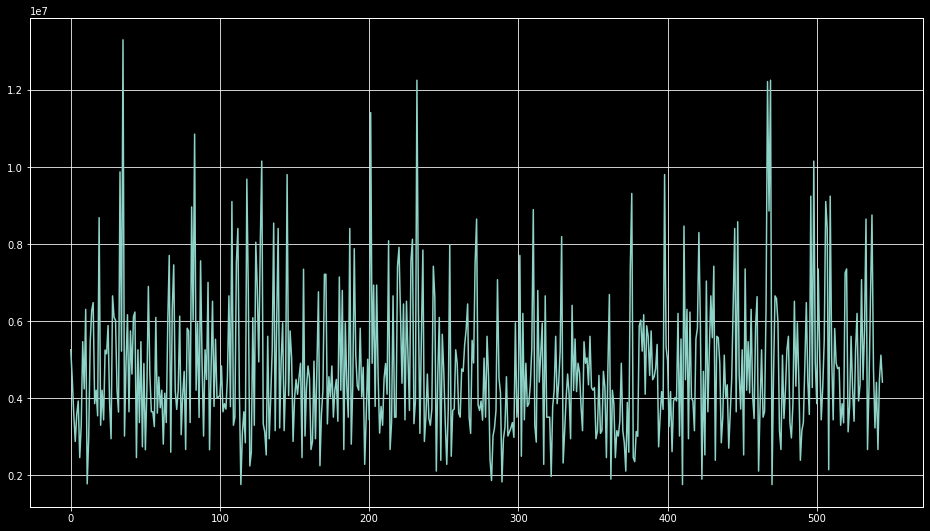

In [ ]:
plt.plot(Y)# la pendiente me quiere decir que esta bien, si no siguiera una tendencia lienal, estaria mal.
plt.show()
                    # si mi modelo dice algo el otro modelo me dice lo mismo(caso ideal)

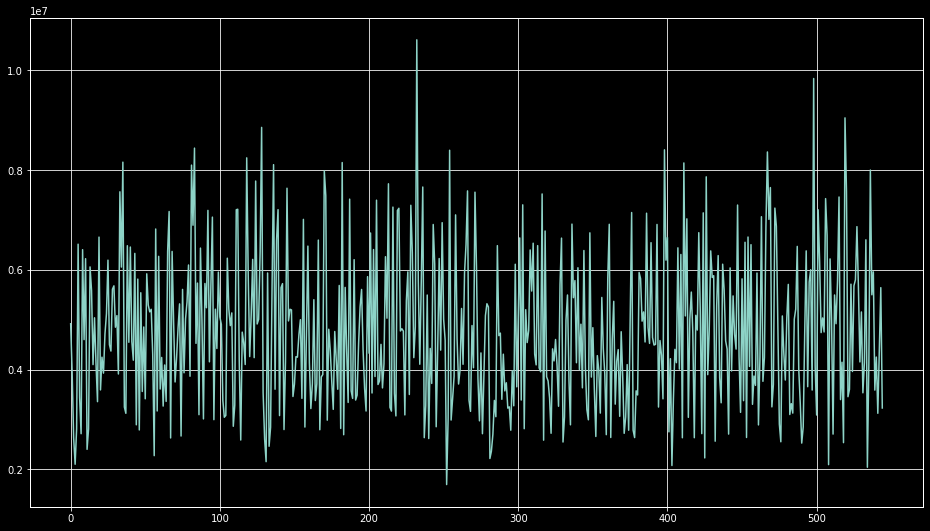

In [ ]:
plt.plot(hipotesis)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print("r2 score:",r2_score(Y,hipotesis))

r2 score: 0.6833994332756973


**Regresión por redes neuronales: (sin PCA)**

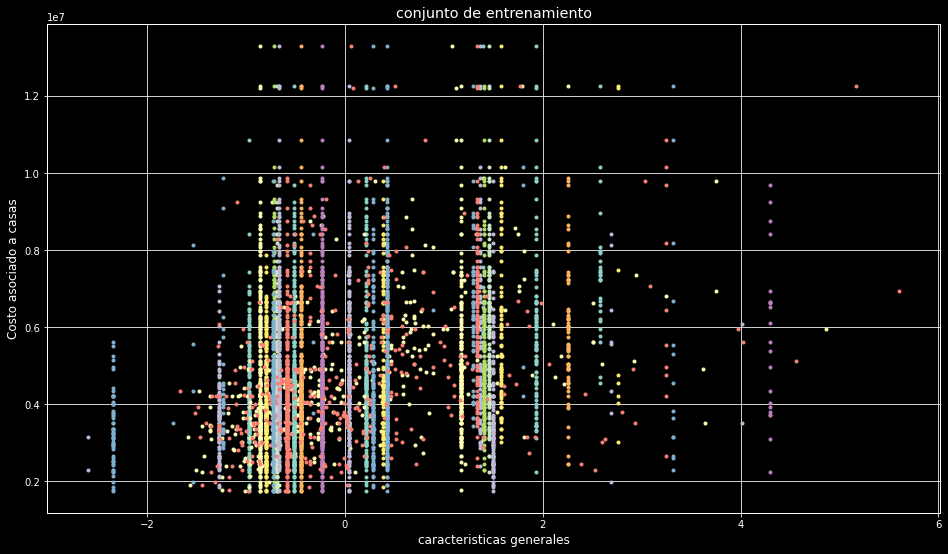

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1)

scaler = StandardScaler()#StandardScaler, MinMaxScaler
scaler.fit(x_train)# halla la media por caracteristica y la desviacion estandar por caracteristica de cada uno de los datos
X_train =scaler.transform(x_train)# se resta la media y se divide entre la desviacion estandar
X_test  = scaler.transform(x_test)
# Se grafica el conjunto de entrenamiento:
plt.figure()
plt.plot(X_train,y_train,'.',label='train data')
plt.xlabel('caracteristicas generales')
plt.ylabel('Costo asociado a casas')
plt.title('conjunto de entrenamiento')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(20,20,10),alpha=0.1,activation="relu",random_state=1,learning_rate='constant', max_iter=6000,solver="adam",verbose=True)
#hidden_layer_sizes  - cantidad de capas ocultas. es decir, una capa de 100, otra capa de 50 en este caso.
#regr = MLPRegressor(random_state=1, max_iter=500).
#solver - metodo por el cual el va a resolver el problema de optimizacion. por defecto es backpropagation.
#alpha  - coeficiente de regularizacion
#batch_size - tamaño del lote
#learning_rate  se poonte igual a 'adaptive'
#learning_rate_init - es en cuanto lo quiere inicializar. esta en default como 0.001
print(regr.fit(X_train, y_train))

Iteration 1, loss = 13068788837583.14453125
Iteration 2, loss = 13068788291698.62304688
Iteration 3, loss = 13068787786118.84765625
Iteration 4, loss = 13068787316503.25195312
Iteration 5, loss = 13068786864691.85351562
Iteration 6, loss = 13068786447217.15625000
Iteration 7, loss = 13068786042224.49804688
Iteration 8, loss = 13068785662704.42187500
Iteration 9, loss = 13068785292885.45507812
Iteration 10, loss = 13068784939358.54687500
Iteration 11, loss = 13068784597357.93554688
Iteration 12, loss = 13068784270918.13281250
Iteration 13, loss = 13068783952600.56640625
Iteration 14, loss = 13068783648123.18945312
Iteration 15, loss = 13068783343972.43359375
Iteration 16, loss = 13068783049644.48242188
Iteration 17, loss = 13068782751476.22851562
Iteration 18, loss = 13068782455422.90429688
Iteration 19, loss = 13068782129693.30859375
Iteration 20, loss = 13068781785508.23437500
Iteration 21, loss = 13068781417306.99414062
Iteration 22, loss = 13068781038036.85742188
Iteration 23, loss 

In [ ]:
print("R^2 entrenamiento",regr.score(X_train,y_train))
print("R^2 validacion",regr.score(X_test, y_test))

R^2 entrenamiento 0.7063218519777165
R^2 validacion 0.5411188386922211


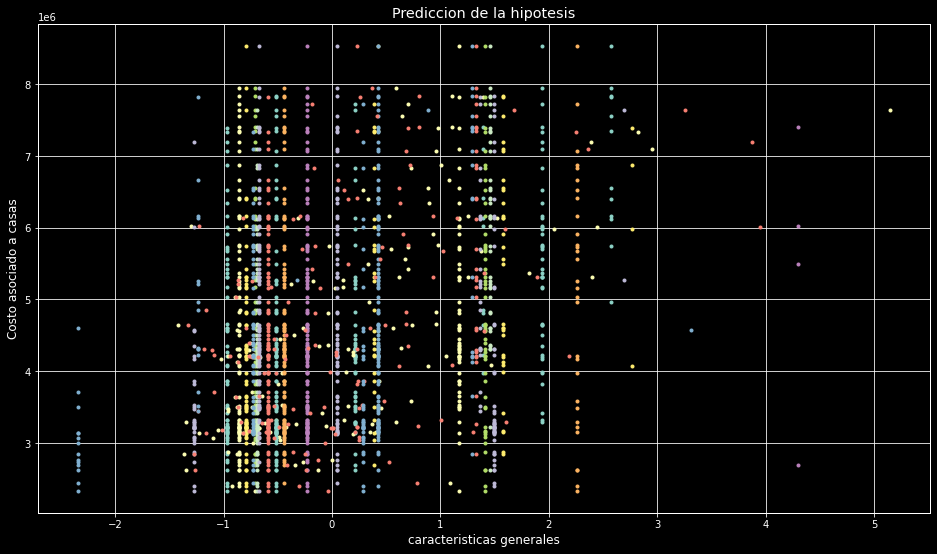

In [ ]:
y_test_pred=regr.predict(X_test)
plt.figure()
plt.plot(X_test,y_test_pred,'.',label='Complete data')
plt.xlabel('caracteristicas generales')
plt.ylabel('Costo asociado a casas')
plt.title('Prediccion de la hipotesis')
plt.show()

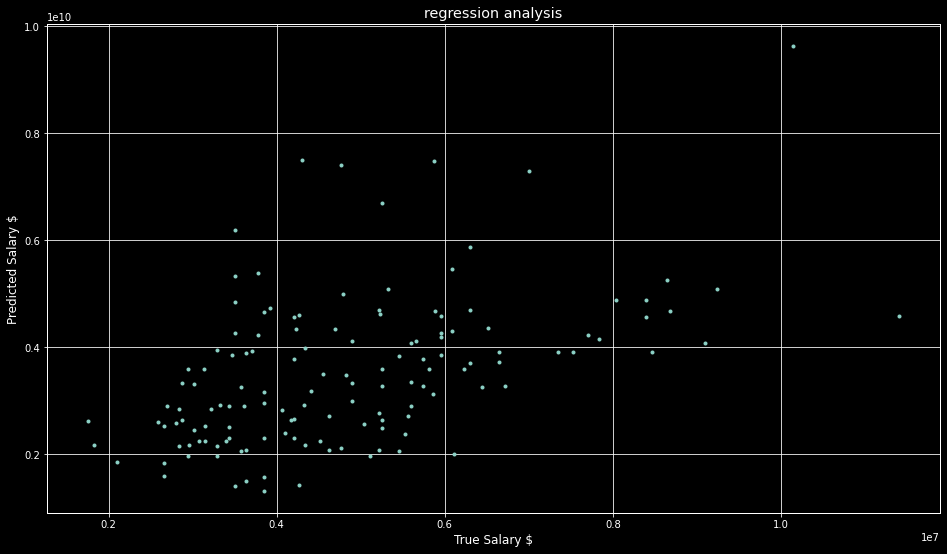

In [ ]:
y_test_pred=regr.predict(x_test)
plt.figure()
plt.plot(y_test,y_test_pred,'.')
plt.xlabel('True Salary $')
plt.ylabel('Predicted Salary $')
plt.title('regression analysis')
plt.show()

**Regresión por redes neuronales: (con PCA)**

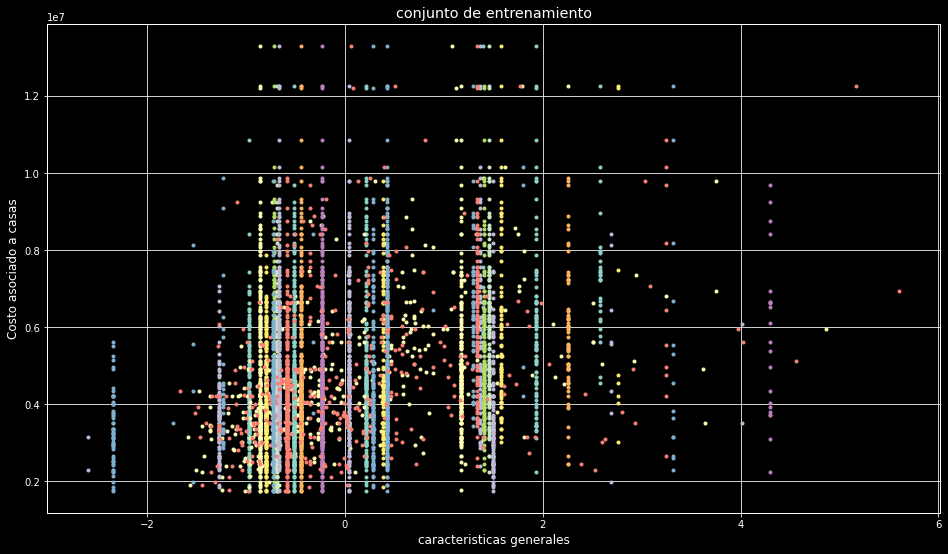

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1)

scaler = StandardScaler()#StandardScaler, MinMaxScaler
scaler.fit(x_train)# halla la media por caracteristica y la desviacion estandar por caracteristica de cada uno de los datos
X_train =scaler.transform(x_train)# se resta la media y se divide entre la desviacion estandar
X_test  = scaler.transform(x_test)
# Se grafica el conjunto de entrenamiento:
plt.figure()
plt.plot(X_train,y_train,'.',label='train data')
plt.xlabel('caracteristicas generales')
plt.ylabel('Costo asociado a casas')
plt.title('conjunto de entrenamiento')
plt.show()

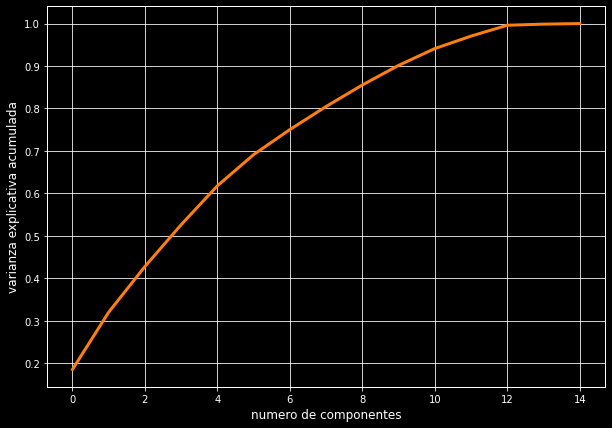

In [ ]:
pca = PCA()
Xs=pca.fit(X_train)
plt.figure(figsize=(10,7))
plt.style.use("dark_background")
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=3)
plt.xlabel("numero de componentes")
plt.ylabel("varianza explicativa acumulada")
plt.show()

In [ ]:
x_proj_train = pca.transform(X_train)[:,0:12]
x_proj_test  = pca.transform(X_test)[:,0:12]

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(20,20,10),alpha=0.1,activation="relu",random_state=1,learning_rate='constant', max_iter=6000,solver="adam",verbose=True)
#hidden_layer_sizes  - cantidad de capas ocultas. es decir, una capa de 100, otra capa de 50 en este caso.
#regr = MLPRegressor(random_state=1, max_iter=500).
#solver - metodo por el cual el va a resolver el problema de optimizacion. por defecto es backpropagation.
#alpha  - coeficiente de regularizacion
#batch_size - tamaño del lote
#learning_rate  se poonte igual a 'adaptive'
#learning_rate_init - es en cuanto lo quiere inicializar. esta en default como 0.001
print(regr.fit(x_proj_train, y_train))

In [ ]:
print("R^2 entrenamiento",regr.score(x_proj_train,y_train))
print("R^2 validacion",regr.score(x_proj_test, y_test))

R^2 entrenamiento 0.6989780911290342
R^2 validacion 0.5874991624699508
